In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import sklearn
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import os 
import pathlib 
import random
import matplotlib.image as mpimg
import zipfile
import wget
import tensorflow_hub as hub

### Get Helper Functions

In [2]:
import requests
url = "https://raw.githubusercontent.com/Meta-c/Helper-ML/master/ML_functions.py"


response = requests.get(url)
code = response.text

exec(code)

### Getting Data

In [3]:
train_dir="10_food_classes_10_percent/train/"
test_dir="10_food_classes_10_percent/test/"

In [4]:
IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data_10_percent= tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                            image_size=IMG_SIZE,label_mode="categorical",batch_size=BATCH_SIZE)

test_data=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
image_size=IMG_SIZE,
label_mode="categorical",
batch_size=BATCH_SIZE)


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [5]:
for images,labels in train_data_10_percent.take(1):
    print(images,labels)

tf.Tensor(
[[[[2.02056122e+02 7.10561218e+01 1.70561237e+01]
   [2.02780609e+02 7.17806091e+01 1.77806110e+01]
   [1.95260208e+02 6.42602005e+01 1.02602034e+01]
   ...
   [5.11531105e+01 2.28061352e+01 1.20867548e+01]
   [5.67091560e+01 2.39030170e+01 1.33060875e+01]
   [4.93875923e+01 1.20304489e+01 4.86725760e+00]]

  [[1.97785721e+02 6.87857208e+01 1.37857151e+01]
   [2.02653061e+02 7.36530609e+01 1.86530628e+01]
   [2.02158157e+02 7.29438782e+01 1.85867386e+01]
   ...
   [3.75001297e+01 1.10408821e+01 2.12759399e+00]
   [4.60765533e+01 1.79183884e+01 6.99491978e+00]
   [5.13776131e+01 2.11378155e+01 1.12092438e+01]]

  [[1.93862244e+02 6.68622437e+01 1.18622446e+01]
   [1.96903061e+02 6.99030609e+01 1.49030609e+01]
   [1.98443878e+02 7.14438705e+01 1.88724480e+01]
   ...
   [2.72397575e+01 7.66832924e+00 4.74485427e-01]
   [2.83418484e+01 6.61222744e+00 8.26525509e-01]
   [2.81989574e+01 4.41324329e+00 0.00000000e+00]]

  ...

  [[1.51132675e+02 6.84235229e+01 2.23419037e+01]
   [1

## Model 0 : building transfer learning model with functional API
 

In [6]:
# Create base model with tf.keras.applications

base_model=tf.keras.applications.EfficientNetB0(include_top=False)

# Freeze the base model =>underlying pre-trained patterns aren't updated

base_model.trainable=False

# Create inputs into our model

inputs=tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

# Normalize in case of using (ResNet50v2)
# x=tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

x=base_model(inputs)

# Average the outputs 

x=tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling")(x)


# Create the output activation layer

outputs = tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)

# Combine inputs with outputs 

model_0 = tf.keras.Model(inputs,outputs)


16719872/16705208 [==============================] - 5s 0us/step


In [7]:
model_0.compile(loss="categorical_crossentropy",
                     optimizer="Adam",
                     metrics=["accuracy"])

In [8]:
model_0_history=model_0.fit(train_data_10_percent,
                 epochs=5,
                 steps_per_epoch=len(train_data_10_percent),
        validation_data=test_data,
        validation_steps=len(test_data),
        # callbacks=[
        #     create_tensorboard_callback(dir_name="tensorflow_hub",
        #                                 experiment_name="resnet50v2"       )]
         )

Epoch 1/5
24/24 [==============================] - 42s 1s/step - loss: 1.9566 - accuracy: 0.3520 - val_loss: 1.4030 - val_accuracy: 0.6840
Epoch 2/5
24/24 [==============================] - 12s 506ms/step - loss: 1.1783 - accuracy: 0.7240 - val_loss: 0.9454 - val_accuracy: 0.7832
Epoch 3/5
24/24 [==============================] - 12s 480ms/step - loss: 0.8603 - accuracy: 0.7987 - val_loss: 0.7640 - val_accuracy: 0.8168
Epoch 4/5
24/24 [==============================] - 12s 509ms/step - loss: 0.6874 - accuracy: 0.8360 - val_loss: 0.6740 - val_accuracy: 0.8308
Epoch 5/5
24/24 [==============================] - 12s 502ms/step - loss: 0.5992 - accuracy: 0.8573 - val_loss: 0.6161 - val_accuracy: 0.8408


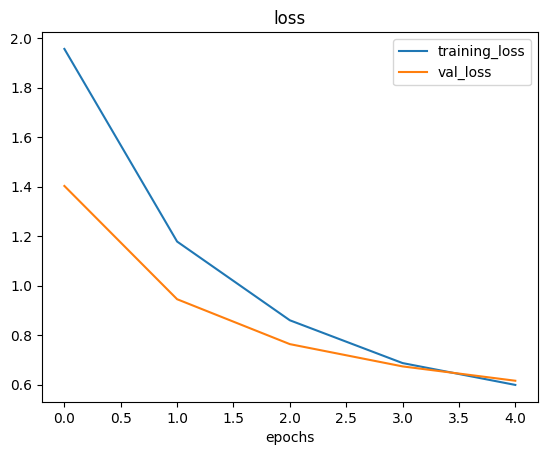

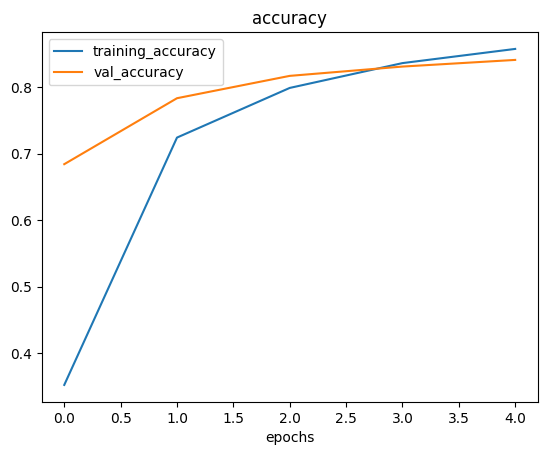

In [9]:
plot_loss_curves(model_0_history)